In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite.sqlite")

In [3]:
checker = pd.io.sql.read_sql("SELECT timestamp From checker WHERE uid LIKE 'user_%'",
                               connection, parse_dates="timestamp")
checker

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


- analyze only the users and not the admins
- the fontsize and the figsize are still the same
- for each hour, calculate the average number of commits on working days and onweekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits
- choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [4]:
checker["day"] = checker["timestamp"].dt.day
checker["weekday"] = checker["timestamp"].dt.dayofweek
checker["hour"] = checker["timestamp"].dt.hour
checker

,timestamp,day,weekday,hour
0,2020-04-17 05:19:02.744528,17,4,5
1,2020-04-17 05:22:35.249331,17,4,5
2,2020-04-17 05:22:45.549397,17,4,5
3,2020-04-17 05:34:14.691200,17,4,5
4,2020-04-17 05:34:24.422370,17,4,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,21,3,20
3203,2020-05-21 20:22:41.785725,21,3,20
3204,2020-05-21 20:22:41.877806,21,3,20
3205,2020-05-21 20:37:00.129678,21,3,20


In [5]:
checker["weekday"].value_counts()

3    772
6    665
1    526
5    505
2    286
0    257
4    196
Name: weekday, dtype: int64

In [6]:
def ft_day(weekday):
    if weekday > 4:
        return "weekend"
    else:
        return "working_day"

In [7]:
checker["weekday"] = checker["weekday"].apply(ft_day)
checker

,timestamp,day,weekday,hour
0,2020-04-17 05:19:02.744528,17,working_day,5
1,2020-04-17 05:22:35.249331,17,working_day,5
2,2020-04-17 05:22:45.549397,17,working_day,5
3,2020-04-17 05:34:14.691200,17,working_day,5
4,2020-04-17 05:34:24.422370,17,working_day,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,21,working_day,20
3203,2020-05-21 20:22:41.785725,21,working_day,20
3204,2020-05-21 20:22:41.877806,21,working_day,20
3205,2020-05-21 20:37:00.129678,21,working_day,20


In [8]:
checker[(checker["weekday"]=="working_day") & (checker["hour"]==17)].count()

timestamp    192
day          192
weekday      192
hour         192
dtype: int64

In [9]:
my = checker[checker["weekday"] == "working_day"]["hour"].value_counts()
my

21    292
19    214
17    192
20    183
16    170
18    167
15    141
10    132
14    122
11     88
12     79
13     73
22     45
8      37
7      31
9      30
5      15
23     15
0       6
6       3
3       2
Name: hour, dtype: int64

In [10]:
ch = pd.DataFrame(my).rename(columns={"hour": "count"})
ch

,count
21,292
19,214
17,192
20,183
16,170
18,167
15,141
10,132
14,122
11,88


In [11]:
checker[(checker["hour"]==17) & (checker["weekday"] == "working_day")]["day"].value_counts(dropna=False)

12    58
14    57
8     18
11    17
13    14
21    10
24    10
20     3
7      2
18     2
19     1
Name: day, dtype: int64

In [12]:
sum(checker[(checker["hour"]==17) & (checker["weekday"] == "working_day")]["day"].value_counts()) / 12

16.0

In [13]:
df1 = checker[checker["weekday"]=="working_day"]
df1 

,timestamp,day,weekday,hour
0,2020-04-17 05:19:02.744528,17,working_day,5
1,2020-04-17 05:22:35.249331,17,working_day,5
2,2020-04-17 05:22:45.549397,17,working_day,5
3,2020-04-17 05:34:14.691200,17,working_day,5
4,2020-04-17 05:34:24.422370,17,working_day,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,21,working_day,20
3203,2020-05-21 20:22:41.785725,21,working_day,20
3204,2020-05-21 20:22:41.877806,21,working_day,20
3205,2020-05-21 20:37:00.129678,21,working_day,20


In [14]:
df1 = checker.groupby(["weekday", "day", "hour"]).count()
df1 = df1.reset_index()


In [15]:
df1

,weekday,day,hour,timestamp
0,weekend,2,7,3
1,weekend,2,8,1
2,weekend,2,9,2
3,weekend,2,10,1
4,weekend,2,11,84
...,...,...,...,...
277,working_day,30,10,8
278,working_day,30,11,1
279,working_day,30,15,4
280,working_day,30,18,11


In [16]:
df2 = df1.groupby(["weekday", "hour"])["timestamp"].mean().reset_index()
df2.head()

,weekday,hour,timestamp
0,weekend,0,2.0
1,weekend,1,6.0
2,weekend,3,1.0
3,weekend,5,2.0
4,weekend,7,4.0


In [17]:
piv1 = pd.pivot_table(df2[df2["weekday"]=="working_day"], index="hour").rename(
            columns={"timestamp": "working_day"})
piv2 = pd.pivot_table(df2[df2["weekday"]=="weekend"], index="hour", aggfunc="mean").rename(
            columns={"timestamp": "weekend"})

In [18]:
ind = pd.DataFrame(list(range(24)), columns=["hour"])
df = ind.merge(piv1, on="hour", how="left").merge(piv2, on="hour", how="left")

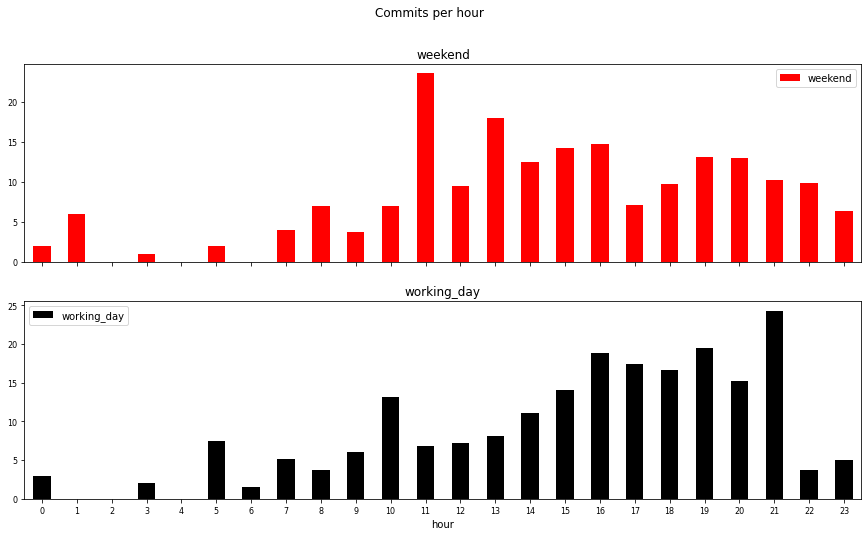

In [19]:
plot = df.plot(kind="bar", title="Commits per hour", fontsize=8, figsize=(15,8), rot=0, 
            stacked=True, colormap="flag",
                x="hour", y=["weekend", "working_day"], subplots=True)

at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
- Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

Answer: Yes, on working day - 11, in weekend - 21.

In [20]:
connection.close()